In [1]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import yfinance as yf
from datetime import date, timedelta
import os


In [2]:

class Get_data:
    
    def __init__(self, symbol, start_date, end_date, interval):
        self.symbol = symbol
        self.start = start_date
        self.end = end_date
        self.interval = interval


    def get_market_data(self):
        data = yf.download(self.symbol, start=self.start, end=self.end, interval=self.interval)
        return data
    
    
    def print_market_data(self):
        market_data = self.get_market_data()
        return market_data
        


In [3]:
#Pulls hourly data from 2 years ago
current_date = date.today()
two_years_ago = current_date - timedelta(days=365*50- +1)
symbol = 'AAPL'
start_date = two_years_ago
end_date = current_date
interval = '1d'

market = Get_data(symbol, start_date, end_date, interval)
df = market.print_market_data()
df.columns = df.columns.str.lower()
df = df[['close']]
df

[*********************100%***********************]  1 of 1 completed


,close
Date,
1980-12-12,0.128348
1980-12-15,0.121652
1980-12-16,0.112723
1980-12-17,0.115513
1980-12-18,0.118862
...,...
2023-06-20,185.009995
2023-06-21,183.960007
2023-06-22,187.000000


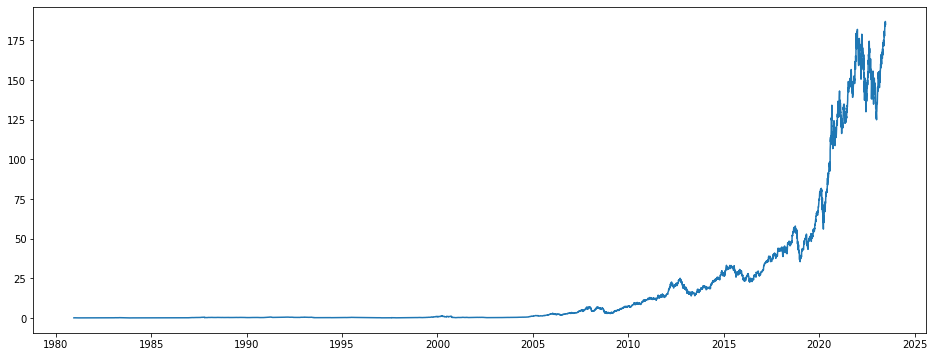

In [4]:
plt.figure(1, figsize=(16,6))
_ = plt.plot(df.close)

In [5]:
df = df.reset_index()
df['returns'] = 0
for x in range(1, len(df.index)):
    change = df.loc[x, 'close'] / df.loc[x-1, 'close'] - 1
    df.loc[x, 'returns'] = change
df = df.set_index('Date')
df

,close,returns
Date,,
1980-12-12,0.128348,0.000000
1980-12-15,0.121652,-0.052171
1980-12-16,0.112723,-0.073398
1980-12-17,0.115513,0.024751
1980-12-18,0.118862,0.028992
...,...,...
2023-06-20,185.009995,0.000487
2023-06-21,183.960007,-0.005675
2023-06-22,187.000000,0.016525


In [6]:
df['log_returns'] = np.log(1+ df.returns)

In [7]:
df.head()

,close,returns,log_returns
Date,,,
1980-12-12,0.128348,0.000000,0.000000
1980-12-15,0.121652,-0.052171,-0.053581
1980-12-16,0.112723,-0.073398,-0.076231
1980-12-17,0.115513,0.024751,0.024450
1980-12-18,0.118862,0.028992,0.028580


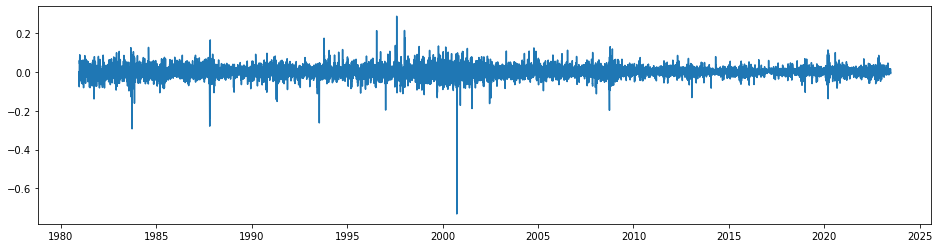

In [8]:
plt.figure(1, figsize=(16, 4))
plt.plot(df.log_returns)

In [9]:
x = df[['close', 'log_returns']].values

In [10]:
x

array([[ 1.28347993e-01,  0.00000000e+00],
       [ 1.21652000e-01, -5.35807626e-02],
       [ 1.12723000e-01, -7.62310219e-02],
       ...,
       [ 1.87000000e+02,  1.63902377e-02],
       [ 1.86679993e+02, -1.71273501e-03],
       [ 1.85270004e+02, -7.58163822e-03]])

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler= MinMaxScaler(feature_range=(0,1)).fit(x)
X_scaled = scaler.transform(x)

In [13]:
X_scaled[:5]

array([[4.23859931e-04, 7.18219387e-01],
       [3.88043075e-04, 6.65593260e-01],
       [3.40281873e-04, 6.43346555e-01],
       [3.55205560e-04, 7.42233341e-01],
       [3.73119388e-04, 7.46290313e-01]])

In [14]:
y = [x[0] for x in X_scaled]

In [15]:
y[:5]

[0.00042385993131035247,
 0.0003880430751445128,
 0.0003402818734647621,
 0.00035520556021276673,
 0.0003731193883965082]

In [16]:
split = int(len(X_scaled) * 0.8)
print(split)

8578


In [17]:
x_train = X_scaled[:split]
x_test = X_scaled[split : len(X_scaled)]
y_train = y[:split]
y_test = y[split : len(y)]

In [18]:
assert len(x_train) == len(y_train)
assert len(x_test) == len(y_test)

In [19]:
n = 4
xtrain = []
ytrain = []
xtest = []
ytest = []

for i in range(n, len(x_train)):
    xtrain.append(x_train[i - n : i, : x_train.shape[1]])
    ytrain.append(y_train[i])
for i in range(n, len(x_test)):
    xtest.append(x_test[i - n : i, : x_test.shape[1]])
    ytest.append(y_test[i])

In [20]:
df.tail()


,close,returns,log_returns
Date,,,
2023-06-20,185.009995,0.000487,0.000487
2023-06-21,183.960007,-0.005675,-0.005691
2023-06-22,187.000000,0.016525,0.016390
2023-06-23,186.679993,-0.001711,-0.001713
2023-06-26,185.270004,-0.007553,-0.007582


In [21]:
xtrain[0]

array([[4.23859931e-04, 7.18219387e-01],
       [3.88043075e-04, 6.65593260e-01],
       [3.40281873e-04, 6.43346555e-01],
       [3.55205560e-04, 7.42233341e-01]])

In [22]:
ytrain[0]

0.0003731193883965082

In [23]:
val = np.array(ytrain[0])
val = np.c_[val, np.zeros(val.shape)]

In [24]:
scaler.inverse_transform(val)

array([[ 0.118862  , -0.73124786]])

In [25]:
xtrain, ytrain = (np.array(xtrain), np.array(ytrain))
xtrain = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1], xtrain.shape[2]))

xtest, ytest = (np.array(xtest), np.array(ytest))
xtest = np.reshape(xtest, (xtest.shape[0], xtest.shape[1], xtest.shape[2]))

In [26]:
print(xtrain.shape)
print(ytrain.shape)
print('---')
print(xtest.shape)
print(ytest.shape)

(8574, 4, 2)
(8574,)
---
(2141, 4, 2)
(2141,)


In [27]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [28]:
input_layer = tf.keras.layers.Input(shape=(xtrain.shape[1], xtrain.shape[2]))
hidden_layer1 = tf.keras.layers.Bidirectional(LSTM(128, activation='relu', return_sequences=True))(input_layer)
hidden_layer2 = tf.keras.layers.Bidirectional(LSTM(64, activation='relu'))(hidden_layer1)
output_layer = tf.keras.layers.Dense(1, activation='linear')(hidden_layer2)

model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer='adam', 
             loss="mean_squared_error")

model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=30, batch_size=32, verbose=1)

Epoch 1/30
268/268 [==============================] - 8s 17ms/step - loss: 1.8334e-04 - val_loss: 0.0432
Epoch 2/30
268/268 [==============================] - 4s 16ms/step - loss: 1.1932e-06 - val_loss: 0.0396
Epoch 3/30
268/268 [==============================] - 4s 15ms/step - loss: 1.4919e-06 - val_loss: 0.0398
Epoch 4/30
268/268 [==============================] - 4s 16ms/step - loss: 1.6366e-06 - val_loss: 0.0391
Epoch 5/30
268/268 [==============================] - 4s 14ms/step - loss: 1.5230e-06 - val_loss: 0.0372
Epoch 6/30
268/268 [==============================] - 4s 14ms/step - loss: 1.8758e-06 - val_loss: 0.0338
Epoch 7/30
268/268 [==============================] - 4s 13ms/step - loss: 1.4873e-06 - val_loss: 0.0335
Epoch 8/30
268/268 [==============================] - 4s 14ms/step - loss: 1.6711e-06 - val_loss: 0.0316
Epoch 9/30
268/268 [==============================] - 4s 14ms/step - loss: 2.0345e-06 - val_loss: 0.0282
Epoch 10/30
268/268 [==============================] - 

In [29]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4, 2)]            0         
                                                                 
 bidirectional (Bidirectiona  (None, 4, 256)           134144    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 298,625
Trainable params: 298,625
Non-trainable params: 0
_________________________________________________________________


In [30]:
trainPredict = model.predict(xtrain)
testPredict = model.predict(xtest)

67/67 [==============================] - 0s 5ms/step


In [31]:
trainPredict = np.c_[trainPredict, np.zeros(trainPredict.shape)]
testPredict = np.c_[testPredict, np.zeros(testPredict.shape)]

In [32]:
trainPredict = scaler.inverse_transform(trainPredict)
trainPredict = [x[0] for x in trainPredict]

testPredict = scaler.inverse_transform(testPredict)
testPredict = [x[0] for x in testPredict]

In [33]:
from sklearn.metrics import mean_squared_error

In [34]:
trainScore = mean_squared_error([x[0][0] for x in xtrain], trainPredict, squared=False)
print(f'Training score: {trainScore}')

testScore = mean_squared_error([x[0][0] for x in xtest], testPredict, squared=False)
print(f'Test score: {testScore}')

Training score: 6.672631751539131
Test score: 90.59843232452583


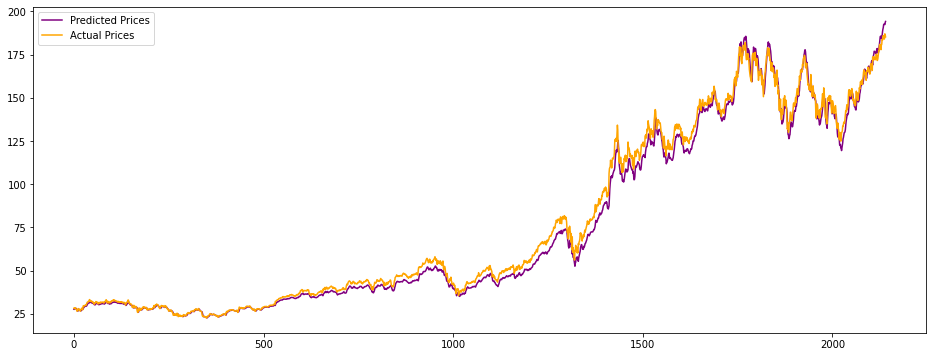

In [35]:
plt.figure(1, figsize=(16, 6))
plt.plot(range(len(testPredict)), testPredict, color='purple', label='Predicted Prices')
plt.plot(range(len(df.close[-len(ytest):])), df.close[-len(ytest):], color='orange', label='Actual Prices')
plt.legend()
plt.show()

In [36]:
predictions = np.concatenate((trainPredict, testPredict), axis=0)

In [37]:
len(predictions)

10715

In [38]:
df['predictions'] = np.nan
df['predictions'][-len(predictions):] = predictions
df['value_difference'] = df.close - df.predictions

In [39]:
df.tail(30)

,close,returns,log_returns,predictions,value_difference
Date,,,,,
2023-05-12,172.570007,-0.006791,-0.006814,176.856409,-4.286402
2023-05-15,172.070007,-0.002897,-0.002902,176.458956,-4.388948
2023-05-16,172.070007,0.000000,0.000000,176.195877,-4.125870
2023-05-17,172.690002,0.003603,0.003597,175.649529,-2.959527
2023-05-18,175.050003,0.013666,0.013574,175.639690,-0.589687
2023-05-19,175.160004,0.000628,0.000628,177.131556,-1.971552
2023-05-22,174.199997,-0.005481,-0.005496,178.244466,-4.044469
2023-05-23,171.559998,-0.015155,-0.015271,178.507823,-6.947825
2023-05-24,171.839996,0.001632,0.001631,177.111654,-5.271658
